In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

## Baseline

In [2]:
# baseline model and test harness for the haberman dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    columns = ['age', 'year', 'nodes', 'class']
    # load the csv file as a data frame
    data = pd.read_csv(full_path, header=None, names=columns,skiprows = 1)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'haberman.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='prior')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

(305, 3) (305,) Counter({1: 225, 2: 80})
Mean BSS: 0.000 (0.000)


## Probabalistic

>LR 0.063 (0.118)
>LDA 0.065 (0.132)
>QDA 0.028 (0.197)
>GNB 0.016 (0.194)
>MNB -0.207 (0.329)
>GPC -0.149 (0.042)


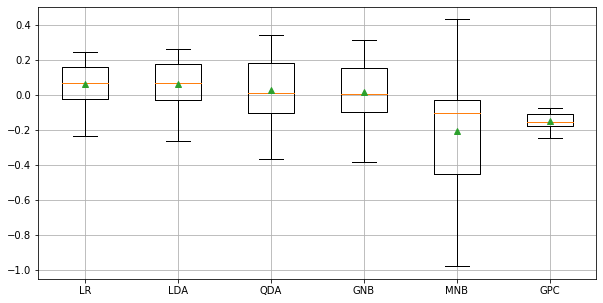

In [3]:
# compare probabilistic model on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    columns = ['age', 'year', 'nodes', 'class']
    # load the csv file as a data frame
    data = pd.read_csv(full_path, header=None, names=columns,skiprows = 1)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    # MNB
    models.append(MultinomialNB())
    names.append('MNB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

## Evaluating with scaled inputs

>LR 0.064 (0.115)
>LDA 0.065 (0.132)
>QDA 0.028 (0.197)
>GNB 0.016 (0.194)
>MNB nan (nan)
>GPC 0.093 (0.120)


C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


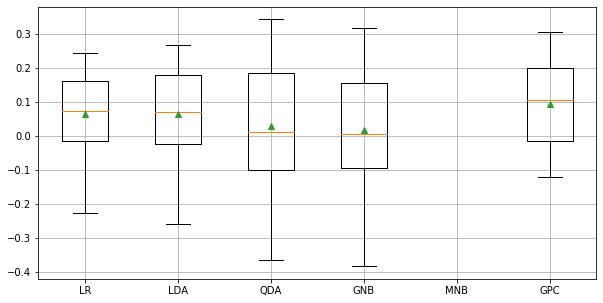

In [4]:
# compare probabilistic models with standardized input on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    columns = ['age', 'year', 'nodes', 'class']
    # load the csv file as a data frame
    data = pd.read_csv(full_path, header=None, names=columns,skiprows = 1)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    # MNB
    models.append(MultinomialNB())
    names.append('MNB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # create a pipeline
    pipeline = Pipeline(steps=[('t', StandardScaler()),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    
# plot the results
pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

## Model evaluation with power transforms

>LR 0.113 (0.124)
>LDA 0.109 (0.145)
>QDA 0.106 (0.179)


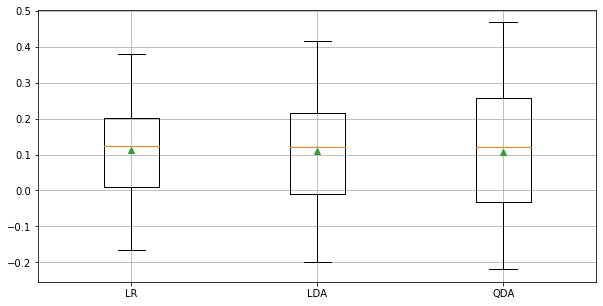

In [5]:
# compare probabilistic models with power transforms on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    columns = ['age', 'year', 'nodes', 'class']
    # load the csv file as a data frame
    data = pd.read_csv(full_path, header=None, names=columns,skiprows = 1)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # create a pipeline
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',models[i])]
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

## Make predictions on new data

In [6]:
# fit a model and make predictions for the haberman dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    columns = ['age', 'year', 'nodes', 'class']
    # load the csv file as a data frame
    data = pd.read_csv(full_path, header=None, names=columns,skiprows = 1)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# define the location of the dataset
full_path = 'haberman.csv'
# load the dataset
X, y = load_dataset(full_path)
# fit the model
steps = [('t1', MinMaxScaler()),('t2', PowerTransformer()),('m',LogisticRegression(solver='lbfgs'))]
model = Pipeline(steps=steps)
model.fit(X, y)
# some survival cases
print('Survival Cases:')
data = [[31,59,2], [31,65,4], [34,60,1]]
for row in data:
    # make prediction
    yhat = model.predict_proba([row])
    # get percentage of survival
    p_survive = yhat[0, 0] * 100
    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))
# some non-survival cases
print('Non-Survival Cases:')
data = [[44,64,6], [34,66,9], [38,69,21]]
for row in data:
    # make prediction
    yhat = model.predict_proba([row])
    # get percentage of survival
    p_survive = yhat[0, 0] * 100
    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))

Survival Cases:
>data=[31, 59, 2], Survival=82.979%
>data=[31, 65, 4], Survival=75.803%
>data=[34, 60, 1], Survival=86.314%
Non-Survival Cases:
>data=[44, 64, 6], Survival=62.591%
>data=[34, 66, 9], Survival=61.766%
>data=[38, 69, 21], Survival=51.597%
